## Google Stock Price Prediction

This notebook includes:
    * Data Preprocessing
    * Model Training
    * Prediction and Visualisation
***

___The comments explain the function of the code block___

In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
# Importing the training set
dataset_train = pd.read_csv(r'D:\freelance posters and projects\Udemy deep learning course\Recurrent_Neural_Networks\Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Only the opening price is required

In [2]:
training_set = dataset_train.iloc[:, 1:2].values
training_set,training_set.shape

(array([[325.25],
        [331.27],
        [329.83],
        ...,
        [793.7 ],
        [783.33],
        [782.75]]), (1258, 1))

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



## Training Phase

* To keep the model simple, I have just used 4 LSTM layers followed by an output layer. 
* Dropout value is set to 0.2 based on the number of entries in the Dataset
* The model is defined by the build_regressor function



In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


def build_regressor(optimizer):
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    # Adding a second LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a third LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a fourth LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')

    return regressor

Using TensorFlow backend.


* For using optimum values, a GridSearchCV run on a small parameter list returns the following best paramaters:
  * `{'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}`
  
(You can run the block below on a local environment to get similar results)  

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

regressor = KerasRegressor(build_fn = build_regressor)
parameters = {'batch_size': [25, 32],
              
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)
# Fitting the RNN to the Training set
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_




Compiling and Training the model with the optimum parameters

In [6]:
# Compiling the RNN
final_regressor= build_regressor('rmsprop')

# Fitting the RNN to the Training set
final_regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0377
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0138
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0121
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0101
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0084
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0080
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0082
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0072
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0067
Epoch 10/

Now predicting future trends using this Deep Learning RNN

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv(r'D:\freelance posters and projects\Udemy deep learning course\Recurrent_Neural_Networks\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values



In [11]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = final_regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

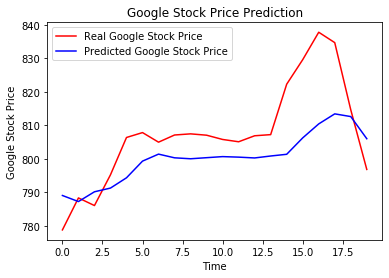

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

The predicted curve was able to guess the trends accurately. But just for the sake of checking how much the predicted prices differ with the actual prices, the RMSE score can be used

In [14]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

12.08132775676655